# Part II - Communcating Loan Data Findings from Prosper
## by Israel Daniel

## Investigation Overview

> For the loan terms, loans of 36 months had a very high frequency of 69% compared to other terms, with loan terms of 60 months following with a much lower frequency of 29% and 12 months falling behind with a small frequency of just 2%. 

> While exploring, it was discovered that average earners to tend to fall under the risk scores from 1.0 - 8.0 of which they led in those scores among other earners, the richer borrowers usually had the best risk scores due to their earning potential.

> It was also discovered that most of the original loan amounts had low interest rates, with some of them below 15,000 having very high rates.

> Terms and Employment Status had an influence with the interest rates which was expected except for the terms which was discovered. Retired borrowers had the lowest rates in both Borrower rates and borrower APRs while not-employed borrowers had the highest rates in average. Part-time and Full-time borrowers tend to have similar rates across the different terms. Also, terms of 12 months tend to have the lowest rates among both the borrower rate and borrower apr.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.. 

In [1]:
# import necessary packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# prints first 5 rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Assign columns to be explored to a variable
variables = ['ListingKey', 'BorrowerRate', 'LoanStatus', 'EmploymentStatus', 
             'Term', 'Occupation', 'IncomeRange', 'StatedMonthlyIncome', 'ProsperRating (Alpha)', 
            'ProsperScore', 'IncomeVerifiable', 'ListingCreationDate', 'BorrowerAPR', 
            'BorrowerState', 'LoanOriginalAmount', 'MonthlyLoanPayment']

loan_data = df[variables]

In [5]:
#Drop rows with missing values
loan_data = loan_data.dropna()

In [6]:
#Create variable names to avoid code repetition
base_color = sns.color_palette()[0]

### What is the percentage frequency of the loan terms?

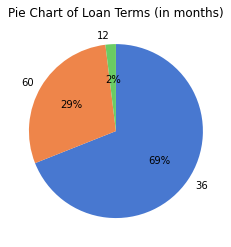

In [7]:
#Arranges the values into a sorted order
sorted_counts = loan_data['Term'].value_counts()
# We will use the option 'Square'.
plt.axis('square')

palette_color = sns.color_palette('muted')
#Set the title and plot the chart
plt.title('Pie Chart of Loan Terms (in months)')
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, colors = palette_color, 
        counterclock = False, autopct='%.0f%%');

From the above chart, 36 months is the most frequent term preferred among borrowers with a leading percentage of 69%, with 60 months following next with a much lower percentage frequency of 29%. 12 months comes up as the option with the lowest frequency of just 2% among others.

## Relationship between the Income Range and the Loan's Risk Score?

> The chart below will help us depict the relationship between these two variables.

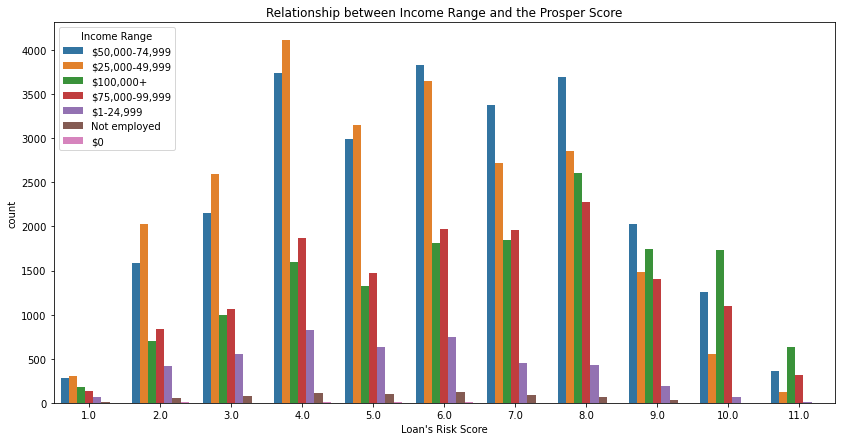

In [8]:
plt.figure(figsize=[14, 7])
sns.countplot(data = loan_data, x = 'ProsperScore', hue = 'IncomeRange');
plt.xlabel('Loan\'s Risk Score')
plt.title('Relationship between Income Range and the Prosper Score');
plt.legend(loc=2, title='Income Range');

Borrower's Income Range from 49,999-74,999 tend to lead among others within risk score of 1.0 - 8.0. Borrowers with income range of $100,000+ are very few among low risk scores and seem to take the lead in the best risk scores. In summary richer borrowers have low risk scores. It can also be derived that most of these borrowers are within the average income range.

## What affects the borrower's interest?
**The loan terms and employment status tend to affect the borrower's interest and will be seen in the next slide.**

In [9]:
#Define a function create a pointplot using inputed variables
def point(x, y, h, label1, label2, label3, label4):
    #Sets the figure size
    plt.figure(figsize=[8,6])
    # Create a pointplot chart
    sns.pointplot(data=loan_data, x=x, y=y, hue=h,
                   palette='tab10');
    plt.legend(loc=3, title=label4);
    plt.title(label1);
    plt.xlabel(label2);
    plt.ylabel(label3);
    plt.xticks(rotation = 45);

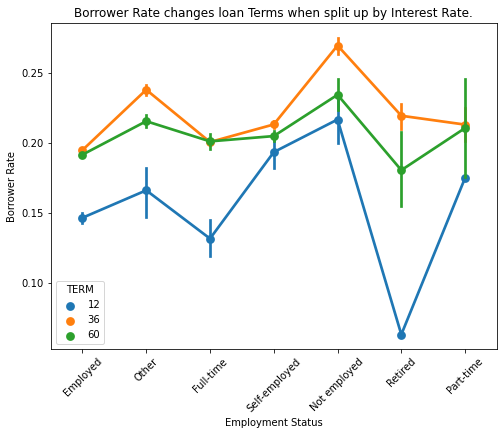

In [10]:
#Plot a pointplot with the point function
point('EmploymentStatus', 'BorrowerRate', 'Term', 
     'Borrower Rate changes loan Terms when split up by Interest Rate.',
     'Employment Status', 'Borrower Rate', 'TERM')

From the visualization above, retired borrowers tend to have the lowest interest rates while the not-employed borrowers exhibit the highest interest rates. The terms also have an interesting effect as shorter terms have lower rates with 12 months being the lowest. Loans with 36 months follows next with a few exception for full-time and part-time borrowers at which they share similar rates. The employed borrowers exhibit a small variance.

## What affects the borrower’s APR?
**Terms and Employment Status will be compared with the Borrower's APR.**

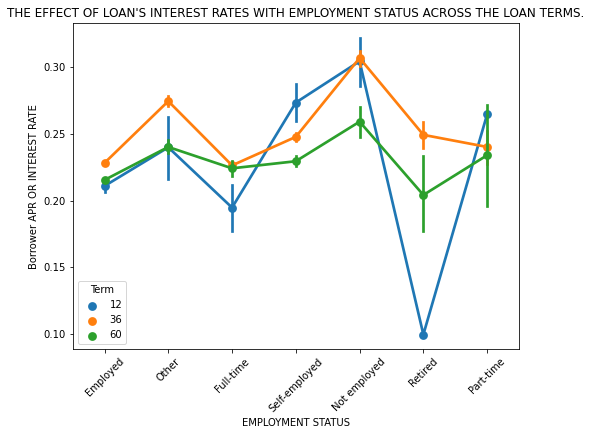

In [11]:
#Plot a pointplot with the point function
point('EmploymentStatus', 'BorrowerAPR', 'Term',
     'THE EFFECT OF LOAN\'S INTEREST RATES WITH EMPLOYMENT STATUS ACROSS THE LOAN TERMS.',
     'EMPLOYMENT STATUS', 'Borrower APR OR INTEREST RATE', 'Term')

From the visualization above, those among the not-employed tend to have the highest interest rates, while those among the retired tend to have the smallest rates among the three terms (with the exception of the 36 months term, where full-time carries the shortest rates). The interest rates for retired borrowers exhibits the highest variance among the term, while employed borrowers exhibits the lowest variance.

## Multivariate Relationship between Borrower Rate, Monthly Loan Payment and the Original Loan Amount.

In [12]:
#Define a function create a scatterplot using inputed variables
def scatter(x, y, c, label1, label2, label3, label4):
    #Set figure size
    plt.figure(figsize=[15, 6])
    #Plotting the chart
    plt.scatter(data=loan_data, x=x, y=y, c = c);
    #Setting the x and y labels
    plt.xlabel(label2);
    plt.ylabel(label3);
    #Setting the title
    plt.title(label1);
    #Add the color bar
    plt.colorbar(label=label4);

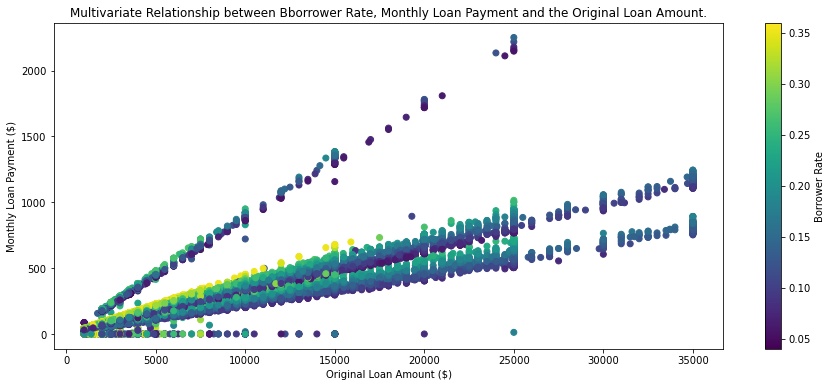

In [13]:
#Plot the chart with the scatter function
scatter('LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerRate', 
        'Multivariate Relationship between Bborrower Rate, Monthly Loan Payment and the Original Loan Amount.', 
        'Original Loan Amount ($)', 'Monthly Loan Payment ($)', 'Borrower Rate')

Most of the loans exhibits low interest rates. Although, some of the original loan amounts below 15,000 tend to have very high rates which I think is as a result or high risk scores.

### Multivariate Relationship between Prosper Score, Monthly Loan Payment and the Original Loan Amount?

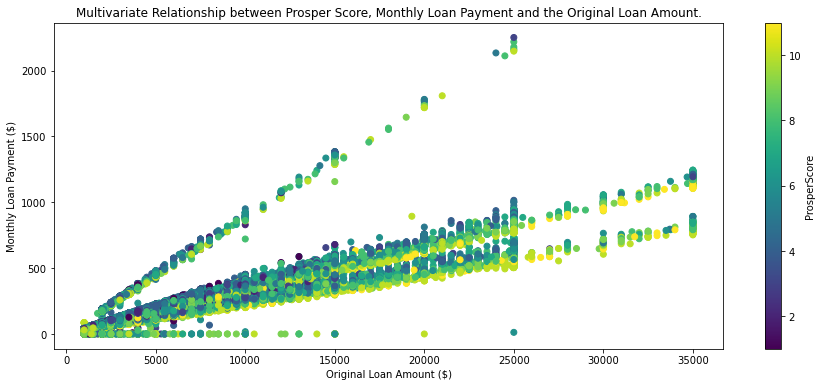

In [14]:
#Plot the chart with the scatter function
scatter('LoanOriginalAmount', 'MonthlyLoanPayment', 'ProsperScore',
       'Multivariate Relationship between Prosper Score, Monthly Loan Payment and the Original Loan Amount.',
       'Original Loan Amount ($)', 'Monthly Loan Payment ($)', 'ProsperScore')

From the chart above, there seem to be a steady rise between monthly loan payment and original loan amount, though not distinct as they are some values not following the common trend. The risk score does not possess a common trend but there seem to be most of the lower scores among the lower values with most of the higher score among the higher values.

In [ ]:
!jupyter nbconvert Part_II_Communicating_Loan_Data_Findings_from_Prosper.ipynb --to slides --post serve --no-input --no-prompt